# Predicting Sub-grade

The next step is to predict the sub-grade assigned to a loan. Because we are
going to use the same dataset as for the grade, we will just read the pickle
file we previously generated.

In [55]:

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from pycaret.regression import *
from sklearn.metrics import classification_report, confusion_matrix,make_scorer
from sklearn.model_selection import train_test_split

from script import make_mi_scores, plot_mi_scores, max_mae

In [54]:
df = pd.read_pickle('./df.pkl')

Instead of using 35 different classes, we are going to convert them to numbers from 1 to 35 and treat this as an ordinal regression problem.

In [27]:
sub_grade_mapping = {
    'A1': 1, 'A2': 2, 'A3': 3, 'A4': 4, 'A5': 5,
    'B1': 6, 'B2': 7, 'B3': 8, 'B4': 9, 'B5': 10,
    'C1': 11, 'C2': 12, 'C3': 13, 'C4': 14, 'C5': 15,
    'D1': 16, 'D2': 17, 'D3': 18, 'D4': 19, 'D5': 20,
    'E1': 21, 'E2': 22, 'E3': 23, 'E4': 24, 'E5': 25,
    'F1': 26, 'F2': 27, 'F3': 28, 'F4': 29, 'F5': 30,
    'G1': 31, 'G2': 32, 'G3': 33, 'G4': 34, 'G5': 35
}

df['Sub_Grade_Numerical'] = df['Sub_Grade'].map(sub_grade_mapping).astype(int)

For the EDA part, we are going to choose the 10 features with the highest mutual information score, just like we did for Grade.

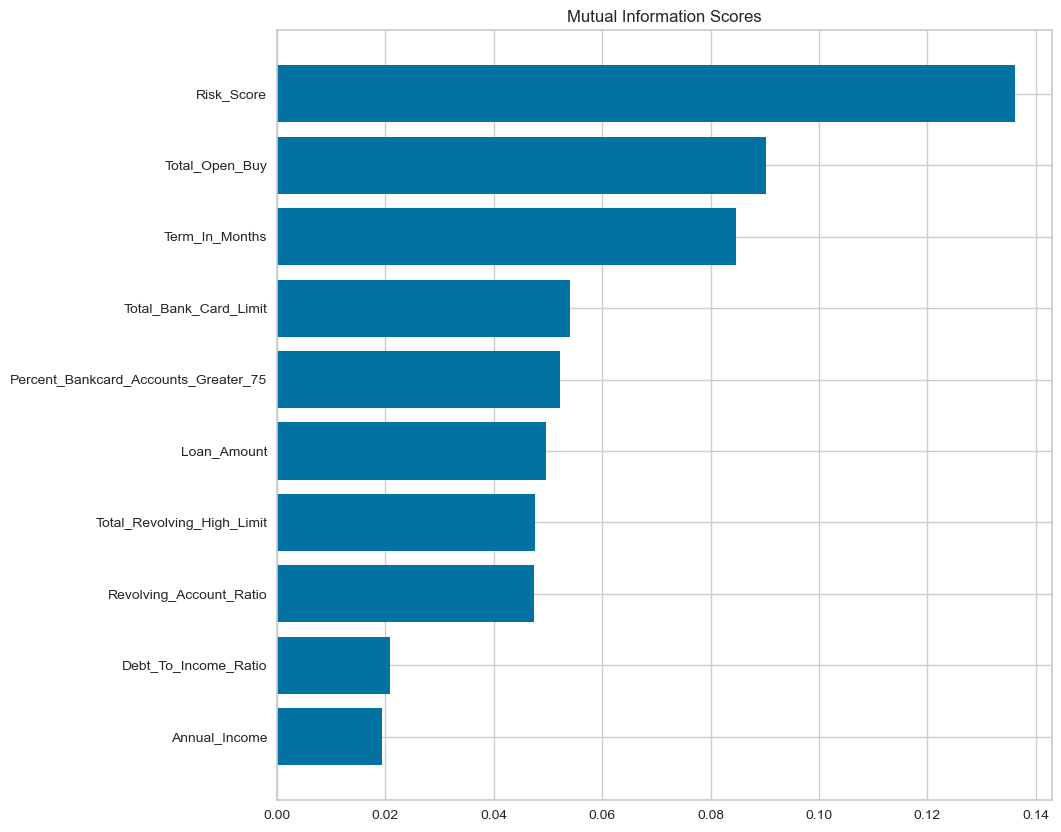

In [108]:
sample = df.sample(frac=0.05, random_state=42).dropna()
mi_scores = make_mi_scores(
    sample.drop(['Sub_Grade', 'Interest_Rate', 'id', 'Sub_Grade_Numerical'],
                axis=1)
    .select_dtypes
    (include=np.number), sample['Sub_Grade'])

plt.figure(dpi=100, figsize=(10, 10))
plot_mi_scores(mi_scores.nlargest(10))

## Exploratory Data Analysis

KeyboardInterrupt: 

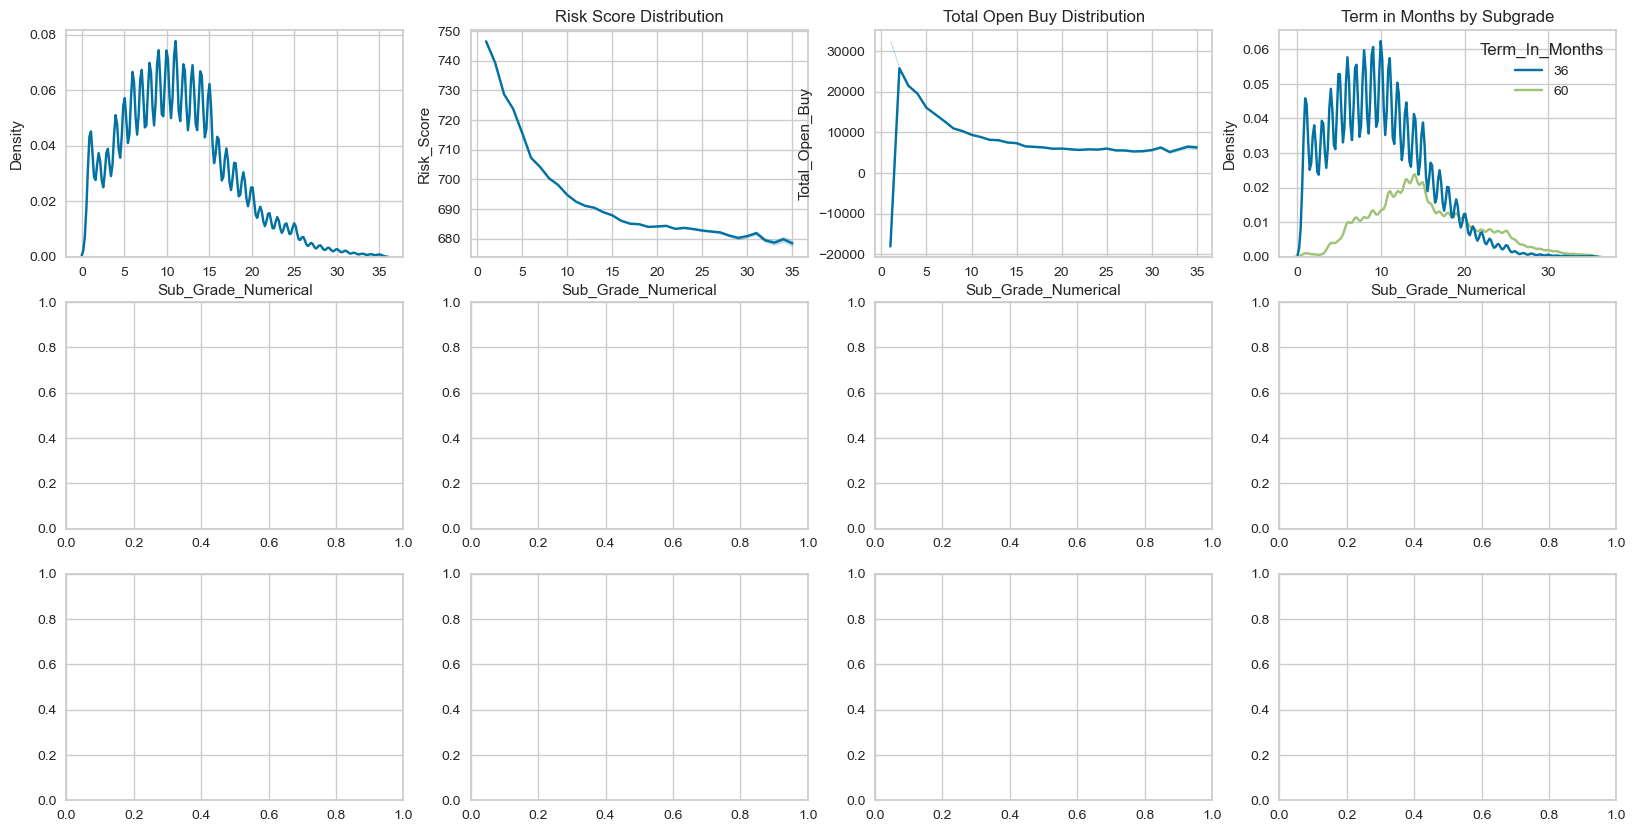

In [50]:
fig, axes = plt.subplots(3, 4, figsize=(20, 10))

sns.kdeplot(data=df, x='Sub_Grade_Numerical', ax=axes[0, 0])
axes[0, 1].set_title('Subgrade Distribution')

sns.lineplot(data=df, y='Risk_Score', x='Sub_Grade_Numerical',
             ax=axes[0, 1])
axes[0, 1].set_title('Risk Score Distribution')

sns.lineplot(data=df, y='Total_Open_Buy', x='Sub_Grade_Numerical',
             ax=axes[0, 2])
axes[0, 2].set_title('Total Open Buy Distribution')

sns.kdeplot(x=df['Sub_Grade_Numerical'], hue=df['Term_In_Months'].astype(str),
            ax=axes[0, 3])
axes[0, 3].set_title('Term in Months by Subgrade')

sns.lineplot(data=df, y='Total_Bank_Card_Limit', x='Sub_Grade_Numerical',
             ax=axes[1, 0])
axes[1, 0].set_title('Total Bank Card Limit Distribution')

sns.lineplot(data=df, y='Revolving_Account_Ratio', x='Sub_Grade_Numerical',
             ax=axes[1, 1])
axes[1, 1].set_title('Revolving Account Ratio Distribution')

sns.lineplot(data=df, y='Percent_Bankcard_Accounts_Greater_75',
             x='Sub_Grade_Numerical',
             ax=axes[1, 2])
axes[1, 2].set_title('Percent Bankcard Accounts Greater than 75 Distribution')

sns.lineplot(data=df, y='Loan_Amount', x='Sub_Grade_Numerical',
             ax=axes[1, 3])
axes[1, 3].set_title('Loan Amount Distribution')

sns.lineplot(data=df, y='Total_Revolving_High_Limit', x='Sub_Grade_Numerical',

             ax=axes[2, 0])
axes[2, 0].set_title('Total Revolving High Limit Distribution')

sns.lineplot(data=df, y='Revolving_Account_Ratio', x='Sub_Grade_Numerical',
             ax=axes[2, 1])
axes[2, 1].set_title('Revolving Account Ratio Distribution')

sns.lineplot(data=df, y='Debt_To_Income_Ratio', x='Sub_Grade_Numerical',
             ax=axes[2, 2])
axes[2, 2].set_title('Debt to Income Ratio Distribution')

plt.tight_layout()
plt.show()

<AxesSubplot: xlabel='Sub_Grade_Numerical', ylabel='Density'>

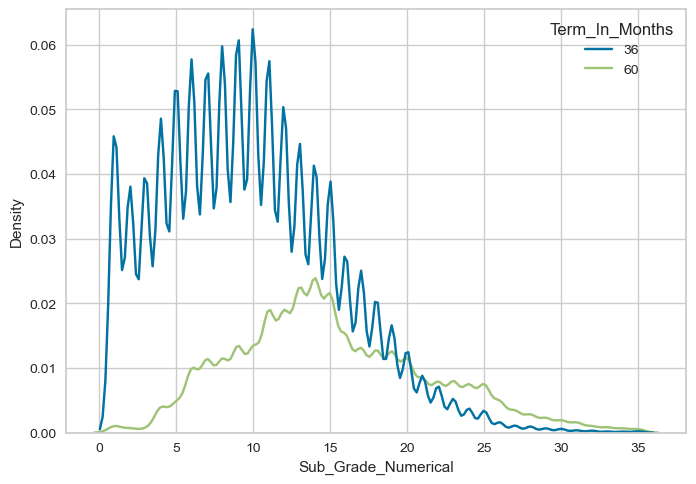

## Statistical Analysis

## Statistical Modelling

Since this is the last step of our project, we can assume we have already predicted the loan grade. Therefore, we will keep it as a feature for our model.

In [56]:
sub_grade_mapping = {
    'A1': 1, 'A2': 2, 'A3': 3, 'A4': 4, 'A5': 5,
    'B1': 6, 'B2': 7, 'B3': 8, 'B4': 9, 'B5': 10,
    'C1': 11, 'C2': 12, 'C3': 13, 'C4': 14, 'C5': 15,
    'D1': 16, 'D2': 17, 'D3': 18, 'D4': 19, 'D5': 20,
    'E1': 21, 'E2': 22, 'E3': 23, 'E4': 24, 'E5': 25,
    'F1': 26, 'F2': 27, 'F3': 28, 'F4': 29, 'F5': 30,
    'G1': 31, 'G2': 32, 'G3': 33, 'G4': 34, 'G5': 35
}




In [57]:
X = df.drop(['id', 'Interest_Rate', 'Sub_Grade'], axis=1)
y = df['Sub_Grade']

Even though we numerified the subgrade, we still want it to be evenly represented in our dataset splits. Therefore, we are going to use stratification.

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7,
                                                    stratify=y,
                                                    random_state=42)

In [59]:
X_pycaret, X_rest, y_pycaret, y_rest = train_test_split(X_train, y_train,
                                                        train_size=1 / 7,
                                                        stratify=y_train,
                                                        random_state=42)

In [60]:
y_pycaret = y_pycaret.map(sub_grade_mapping).astype(int)

In [61]:
y_train = y_train.map(sub_grade_mapping).astype(int)

In [62]:
y_test = y_test.map(sub_grade_mapping).astype(int)

In [ ]:
s = setup(pd.concat([X_pycaret, y_pycaret], axis=1), target='Sub_Grade',
          session_id=123, experiment_name='tune_sample')

In [41]:
s = setup(pd.concat([X_train, y_train], axis=1), target='Sub_Grade',
          session_id=123, experiment_name='final_model')
final_model = create_model('lightgbm')
save_model(final_model, 'model_subgrade_final')

,Description,Value
0,Session id,123
1,Target,Sub_Grade
2,Target type,Regression
3,Original data shape,"(1582467, 104)"
4,Transformed data shape,"(1582467, 130)"
5,Transformed train set shape,"(1107726, 130)"
6,Transformed test set shape,"(474741, 130)"
7,Numeric features,98
8,Categorical features,5
9,Rows with missing values,22.1%


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,-0.0000,-0.0000,-0.0000,0.0000,-0.0000,-0.0000
1,1.1421,1.7755,1.3325,0.9549,0.1794,0.1803
2,-0.0000,-0.0000,-0.0000,0.0000,-0.0000,-0.0000
3,-0.0000,-0.0000,-0.0000,0.0000,-0.0000,-0.0000
4,1.1431,1.7796,1.3340,0.9552,0.1793,0.1805
5,1.1392,1.7693,1.3302,0.9552,0.1792,0.1793
6,-0.0000,-0.0000,-0.0000,0.0000,-0.0000,-0.0000
7,-0.0000,-0.0000,-0.0000,0.0000,-0.0000,-0.0000
8,1.1464,1.7847,1.3359,0.9552,0.1815,0.1828


Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['Number_Trades_24_Months',
                                              'Annual_Income', 'Total_Open_Buy',
                                              'Number_Delinquent_2_Years',
                                              'Delinquent_Amount',
                                              'Debt_To_Income_Ratio',
                                              'Employment_Length_In_Years',
                                              'Loan_Amount', 'Risk_Score',
                                              'Inquiries_6_Months',
                                              'Mortgage_Accounts', 'Open_Trades',
                                              'Revolving_Acco...
                                              'Verification_Status'],
                                     transformer=OneHotEncoder(cols=['Grade',
                                         

In [68]:
add_metric('mmae', 'MMAE', make_scorer(max_mae,greater_is_better=False), greater_is_better=False)

ValueError: id already present in metrics dataframe.

In [66]:
from script import dummy_metric

add_metric('dummy', 'dummy', make_scorer(dummy_metric,greater_is_better=False), greater_is_better=False)

ValueError: id already present in metrics dataframe.

In [70]:
get_metrics()

AttributeError: '_Scorer' object has no attribute '__name__'

AttributeError: '_Scorer' object has no attribute '__name__'

In [15]:
best_subgrade_model = compare_models(exclude=['svm', 'dummy', 'gbr'],
                                     sort='MMAE')
# save_model(best_subgrade_model,'model_subgrade_untuned_mmae')
# tuned_best_subgrade_model, tuner=tune_model(best_subgrade_model,optimize='MMAE',tuner_verbose=3,return_tuner=True)
# save_model(tuned_best_subgrade_model,'model_subgrade_tuned_mmae')

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,18:36:46
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Lasso Regression


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,MMAE,dummy,TT (Sec)
lr,Linear Regression,1.1720,1.8576,1.3629,0.9533,0.1895,0.1949,0.0000,0.0000,2.6940


KeyboardInterrupt: 

In [39]:
best_subgrade_model = compare_models(exclude=['svm', 'dummy', 'gbr'],
                                     sort='MMAE')
save_model(best_subgrade_model, 'model_subgrade_untuned_mmae')
tuned_best_subgrade_model, tuner = tune_model(best_subgrade_model,
                                              optimize='MMAE', tuner_verbose=3,
                                              return_tuner=True)
save_model(tuned_best_subgrade_model, 'model_subgrade_tuned_mmae')

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,23:23:40
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Random Forest Regressor


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,MMAE,EVS,TT (Sec)
lr,Linear Regression,1.1720,1.8576,1.3629,0.9533,0.1895,0.1949,0.0000,0.9533,3.4760
lasso,Lasso Regression,3.6868,22.3707,4.7297,0.4379,0.4618,0.5867,0.0000,0.4379,8.9540
ridge,Ridge Regression,1.1719,1.8575,1.3629,0.9533,0.1895,0.1949,0.0000,0.9533,1.3500
en,Elastic Net,3.5791,21.2938,4.6145,0.4650,0.4508,0.5670,0.0000,0.4650,9.9580
lar,Least Angle Regression,4278.6178,483353936.5085,11210.3347,-12167758.0035,3.3020,599.2209,0.0000,-12165471.6844,1.3180
llar,Lasso Least Angle Regression,3.6868,22.3707,4.7297,0.4379,0.4618,0.5867,0.0000,0.4379,1.3970
omp,Orthogonal Matching Pursuit,4.5831,33.8224,5.8141,0.1503,0.5760,0.8491,0.0000,0.1503,1.3470
br,Bayesian Ridge,1.1719,1.8576,1.3629,0.9533,0.1895,0.1949,0.0000,0.9533,2.1100
par,Passive Aggressive Regressor,8.6709,200.5125,13.1302,-4.0462,0.8404,1.4758,0.0000,-2.6881,1.9740
huber,Huber Regressor,5.3909,79.5219,8.8061,-0.9977,0.6229,0.8508,0.0000,-0.9705,8.1330


KeyboardInterrupt: 

In [37]:
best_subgrade_model = compare_models(exclude=['svm', 'dummy', 'gbr'],
                                     sort='RMSE')
save_model(best_subgrade_model, 'model_subgrade_untuned')
tuned_best_subgrade_model, tuner = tune_model(best_subgrade_model,
                                              optimize='RMSE', tuner_verbose=3,
                                              return_tuner=True)
save_model(tuned_best_subgrade_model, 'model_subgrade_tuned')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,MMAE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,1.1456,1.7871,1.3368,0.9551,0.1803,0.1810,0.0000,2.5610
xgboost,Extreme Gradient Boosting,1.1474,1.8138,1.3468,0.9544,0.1814,0.1803,0.0000,3.5790
rf,Random Forest Regressor,1.1573,1.8280,1.3520,0.9541,0.1832,0.1843,0.0000,109.5160
et,Extra Trees Regressor,1.1587,1.8416,1.3571,0.9537,0.1832,0.1840,0.0000,102.1220
lr,Linear Regression,1.1720,1.8576,1.3629,0.9533,0.1895,0.1949,0.0000,2.2630
ridge,Ridge Regression,1.1719,1.8575,1.3629,0.9533,0.1895,0.1949,0.0000,1.3390
br,Bayesian Ridge,1.1719,1.8576,1.3629,0.9533,0.1895,0.1949,0.0000,2.1210
ada,AdaBoost Regressor,1.3323,2.5199,1.5844,0.9367,0.1996,0.2004,0.0000,35.9320
dt,Decision Tree Regressor,1.4943,3.6378,1.9073,0.9086,0.2573,0.2286,0.0000,3.5620
en,Elastic Net,3.5791,21.2938,4.6145,0.4650,0.4508,0.5670,0.0000,10.0740


Transformation Pipeline and Model Successfully Saved


,MAE,MSE,RMSE,R2,RMSLE,MAPE,MMAE
Fold,,,,,,,
0,1.1632,1.8284,1.3522,0.9533,0.1843,0.1876,-0.0000
1,1.1646,1.8388,1.3560,0.9539,0.1860,0.1888,-0.0000
2,1.1621,1.8232,1.3503,0.9538,0.1848,0.1880,-0.0000
3,1.1575,1.8110,1.3457,0.9541,0.1864,0.1906,-0.0000
4,1.1568,1.8103,1.3455,0.9547,0.1815,0.1824,-0.0000
5,1.1526,1.7983,1.3410,0.9554,0.1836,0.1862,-0.0000
6,1.1611,1.8165,1.3478,0.9545,0.1833,0.1873,-0.0000
7,1.1643,1.8278,1.3520,0.9543,0.1805,0.1817,-0.0000
8,1.1557,1.8094,1.3451,0.9542,0.1833,0.1853,-0.0000


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).
Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['Number_Trades_24_Months',
                                              'Annual_Income', 'Total_Open_Buy',
                                              'Number_Delinquent_2_Years',
                                              'Delinquent_Amount',
                                              'Debt_To_Income_Ratio',
                                              'Employment_Length_In_Years',
                                              'Loan_Amount', 'Risk_Score',
                                              'Inquiries_6_Months',
                                              'Mortgage_Accounts', 'Open_Trades',
                                              'Revolving_Acco...
                                              'Verification_Status'],
                                     transformer=OneHotEncoder(cols=['Grade',
                                         

In [84]:
tuned_best_subgrade_pycaret_model, tuner = tune_model(
    best_subgrade_pycaret_model, optimize='MSE', tuner_verbose=3,
    return_tuner=True)
save_model(tuned_best_subgrade_pycaret_model, 'model_subgrade_tuned_ord_reg')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.1556,1.8253,1.3510,0.9539,0.1813,0.1818
1,1.1526,1.8076,1.3445,0.9553,0.1784,0.1789
2,1.1487,1.7965,1.3403,0.9554,0.1816,0.1841
3,1.1479,1.7931,1.3391,0.9547,0.1784,0.1799
4,1.1485,1.7959,1.3401,0.9547,0.1795,0.1804
5,1.1497,1.8032,1.3429,0.9546,0.1845,0.1871
6,1.1561,1.8255,1.3511,0.9547,0.1853,0.1868
7,1.1470,1.7979,1.3409,0.9545,0.1815,0.1828
8,1.1510,1.8090,1.3450,0.9539,0.1816,0.1806


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).
Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Number_Trades_24_Months',
                                              'Annual_Income', 'Total_Open_Buy',
                                              'Number_Delinquent_2_Years',
                                              'Delinquent_Amount',
                                              'Debt_To_Income_Ratio',
                                              'Employment_Length_In_Years',
                                              'Loan_Amount', 'Risk_Score',
                                              'Inquiries_6_Months',
                                              'Mortgage_Accounts', 'Open_Trades',
                                              'R...
                  LGBMRegressor(boosting_type='gbdt', class_weight=None,
                                colsample_bytree=1.0, importance_type='split',

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

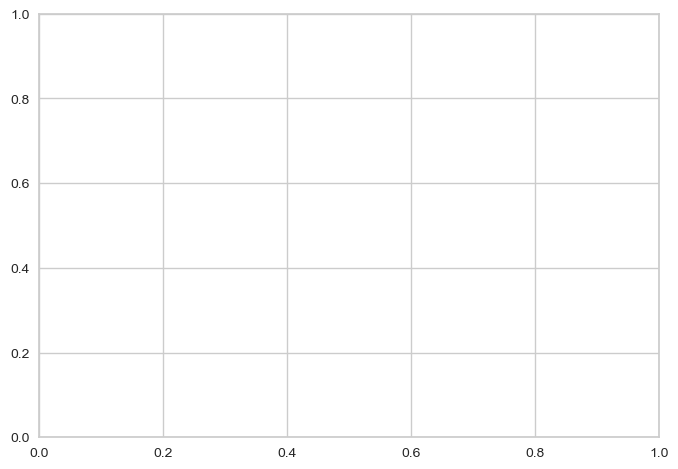

In [85]:
evaluate_model(tuned_best_subgrade_pycaret_model)

In [86]:
pred_unseen = predict_model(tuned_best_subgrade_pycaret_model,
                            pd.concat([X_test, y_test], axis=1))

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,1.1466,1.7890,1.3375,0.9549,0.1805,0.1815


In [88]:
pred_unseen[['Sub_Grade_Numerical', 'prediction_label']]

,Sub_Grade_Numerical,prediction_label
1900085,2,1.786852
1511459,4,3.055329
2115773,9,8.486023
1049567,15,13.506929
678720,4,3.634170
...,...,...
542537,14,13.262981
1606177,6,8.061271
2975,8,8.037128
1228869,4,3.412991


In [93]:
# Define reverse mapping dictionary
reverse_mapping = {
    1: 'A1', 2: 'A2', 3: 'A3', 4: 'A4', 5: 'A5',
    6: 'B1', 7: 'B2', 8: 'B3', 9: 'B4', 10: 'B5',
    11: 'C1', 12: 'C2', 13: 'C3', 14: 'C4', 15: 'C5',
    16: 'D1', 17: 'D2', 18: 'D3', 19: 'D4', 20: 'D5',
    21: 'E1', 22: 'E2', 23: 'E3', 24: 'E4', 25: 'E5',
    26: 'F1', 27: 'F2', 28: 'F3', 29: 'F4', 30: 'F5',
    31: 'G1', 32: 'G2', 33: 'G3', 34: 'G4', 35: 'G5'
}

pred_unseen['rounded_prediction'] = pred_unseen[
    'prediction_label'].round().astype(int)

# Convert rounded numerical predictions back to subgrade labels
pred_unseen['predicted_subgrade'] = pred_unseen['rounded_prediction'].map(
    reverse_mapping)
pred_unseen['Sub_Grade'] = pred_unseen['Sub_Grade_Numerical'].map(
    reverse_mapping)

# Generate classification report
print(classification_report(pred_unseen['Sub_Grade'],
                            pred_unseen['predicted_subgrade']))

[[ 1546 12638 10000 ...     0     0     0]
 [  303  6022 10722 ...     0     0     0]
 [   97  3907 11020 ...     0     0     0]
 ...
 [    0     0     0 ...   222     0     0]
 [    0     0     0 ...   157     0     0]
 [    0     0     0 ...   180     0     0]]


In [95]:
print(confusion_matrix(pred_unseen['Sub_Grade'],
                       pred_unseen['predicted_subgrade']))

[[ 1546 12638 10000 ...     0     0     0]
 [  303  6022 10722 ...     0     0     0]
 [   97  3907 11020 ...     0     0     0]
 ...
 [    0     0     0 ...   222     0     0]
 [    0     0     0 ...   157     0     0]
 [    0     0     0 ...   180     0     0]]


In [45]:
best_subgrade_pycaret_model = compare_models(sort='F1',
                                             exclude=['dummy', 'gbc', 'svm',
                                                      'qda'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.3697,0.0000,0.3697,0.3387,0.3415,0.1971,0.2011,2.9340
lda,Linear Discriminant Analysis,0.3510,0.0000,0.3510,0.3414,0.3398,0.1837,0.1854,0.8320
xgboost,Extreme Gradient Boosting,0.3578,0.0000,0.3578,0.3321,0.3383,0.1843,0.1863,4.8390
rf,Random Forest Classifier,0.3524,0.0000,0.3524,0.3241,0.3290,0.1769,0.1796,3.6190
et,Extra Trees Classifier,0.3513,0.0000,0.3513,0.3227,0.3260,0.1750,0.1781,3.6260
ada,Ada Boost Classifier,0.3473,0.0000,0.3473,0.3187,0.3216,0.1698,0.1729,2.5680
ridge,Ridge Classifier,0.3597,0.0000,0.3597,0.3251,0.3168,0.1864,0.1943,0.5940
dt,Decision Tree Classifier,0.2774,0.0000,0.2774,0.2808,0.2788,0.0923,0.0924,1.1560
lr,Logistic Regression,0.2874,0.0000,0.2874,0.2602,0.2531,0.0926,0.0968,4.8440
knn,K Neighbors Classifier,0.2165,0.0000,0.2165,0.2295,0.2134,0.0274,0.0279,0.8470


In [46]:
tuned_best_subgrade_pycaret_model = tune_model(best_subgrade_pycaret_model,
                                               optimize='F1', tuner_verbose=3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.3664,0.0000,0.3664,0.3408,0.3456,0.1943,0.1969
1,0.3689,0.0000,0.3689,0.3409,0.3476,0.1987,0.2010
2,0.3639,0.0000,0.3639,0.3372,0.3444,0.1919,0.1938
3,0.3616,0.0000,0.3616,0.3321,0.3392,0.1885,0.1908
4,0.3553,0.0000,0.3553,0.3302,0.3369,0.1811,0.1828
5,0.3530,0.0000,0.3530,0.3309,0.3371,0.1796,0.1809
6,0.3626,0.0000,0.3626,0.3412,0.3448,0.1905,0.1926
7,0.3573,0.0000,0.3573,0.3355,0.3411,0.1846,0.1862
8,0.3596,0.0000,0.3596,0.3322,0.3390,0.1871,0.1892


Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [47]:
evaluate_model(tuned_best_subgrade_pycaret_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [19]:
tuned_best_subgrade_pycaret_model = tune_model(best_subgrade_pycaret_model,
                                               optimize='F1', tuner_verbose=3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.1373,0.0000,0.1373,0.1271,0.1305,0.0925,0.0926
1,0.1429,0.0000,0.1429,0.1335,0.1366,0.0988,0.0989
2,0.1386,0.0000,0.1386,0.1293,0.1324,0.0941,0.0942
3,0.1404,0.0000,0.1404,0.1315,0.1343,0.0960,0.0961
4,0.1379,0.0000,0.1379,0.1281,0.1315,0.0935,0.0935
5,0.1398,0.0000,0.1398,0.1307,0.1336,0.0953,0.0954
6,0.1409,0.0000,0.1409,0.1308,0.1343,0.0965,0.0966
7,0.1381,0.0000,0.1381,0.1296,0.1324,0.0937,0.0937
8,0.1417,0.0000,0.1417,0.1317,0.1350,0.0973,0.0974


Fitting 10 folds for each of 10 candidates, totalling 100 fits


XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9, device='cpu', early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.15, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=290, n_jobs=-1,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [20]:
best_F1_model = automl(optimize='F1')

In [48]:
s = setup(pd.concat([X_train, y_train], axis=1), target='Sub_Grade_Number',
          session_id=123, fix_imbalance=True, experiment_name='build_model')

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce MX450, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet t

[LightGBM] [Info] Using GPU Device: NVIDIA GeForce MX450, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[Light

[LightGBM] [Info] Using GPU Device: NVIDIA GeForce MX450, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[Light

[LightGBM] [Info] Using GPU Device: NVIDIA GeForce MX450, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[Light

[LightGBM] [Info] Using GPU Device: NVIDIA GeForce MX450, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[Light

[LightGBM] [Info] Using GPU Device: NVIDIA GeForce MX450, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[Light

,Description,Value
0,Session id,123
1,Target,Sub_Grade_Number
2,Target type,Multiclass
3,Target mapping,"1.0: 0, 2.0: 1, 3.0: 2, 4.0: 3, 5.0: 4"
4,Original data shape,"(303118, 104)"
5,Transformed data shape,"(354596, 124)"
6,Transformed train set shape,"(263660, 124)"
7,Transformed test set shape,"(90936, 124)"
8,Numeric features,98
9,Categorical features,5


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce MX450, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet t

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce MX450, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet t

In [49]:
best_subgrade_model = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.3913,0.0000,0.3913,0.3564,0.3520,0.2228,0.2303
1,0.3874,0.0000,0.3874,0.3465,0.3457,0.2177,0.2251
2,0.3905,0.0000,0.3905,0.3499,0.3485,0.2218,0.2294
3,0.3885,0.0000,0.3885,0.3486,0.3463,0.2189,0.2266
4,0.3850,0.0000,0.3850,0.3454,0.3433,0.2143,0.2218
5,0.3900,0.0000,0.3900,0.3496,0.3471,0.2205,0.2284
6,0.3842,0.0000,0.3842,0.3488,0.3447,0.2134,0.2206
7,0.3901,0.0000,0.3901,0.3509,0.3481,0.2209,0.2287
8,0.3859,0.0000,0.3859,0.3449,0.3431,0.2156,0.2233


In [50]:
tuned_best_subgrade_model_A = tune_model(best_subgrade_pycaret_model,
                                         optimize='F1', tuner_verbose=3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.3863,0.0000,0.3863,0.3542,0.3573,0.2185,0.2229
1,0.3888,0.0000,0.3888,0.3577,0.3607,0.2219,0.2261
2,0.3861,0.0000,0.3861,0.3538,0.3572,0.2185,0.2227
3,0.3866,0.0000,0.3866,0.3544,0.3576,0.2189,0.2232
4,0.3831,0.0000,0.3831,0.3494,0.3536,0.2144,0.2187
5,0.3816,0.0000,0.3816,0.3457,0.3504,0.2121,0.2165
6,0.3824,0.0000,0.3824,0.3506,0.3541,0.2133,0.2174
7,0.3856,0.0000,0.3856,0.3530,0.3563,0.2175,0.2219
8,0.3838,0.0000,0.3838,0.3502,0.3535,0.2152,0.2197


Fitting 10 folds for each of 10 candidates, totalling 100 fits
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.034009 seconds.
You can set `force_row_wise=true` to remove the overhea

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.066043 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 29437
[LightGBM] [Info] Number 

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.067733 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 29418
[LightGBM] [Info] Number 

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.062255 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 29430
[LightGBM] [Info] Number 

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.036355 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=tru

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.067730 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 29448
[LightGBM] [Info] Number 

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.064621 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 29460
[LightGBM] [Info] Number 

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.065070 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 29437
[LightGBM] [Info] Number 

[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.031547 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=tru

[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.036105 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=tru

[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.046769 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=tru

[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.029970 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=tru

[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.033211 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=tru

[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.037253 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=tru

[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.043245 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=tru

[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.037035 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=tru

[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.073499 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 29460
[LightGBM] [Info] Number 

[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.071917 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 29437
[LightGBM] [Info] Number 

[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.036041 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=tru

[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.068991 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 29426
[LightGBM] [Info] Number 

[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.031131 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=tru

[CV] END actual_estimator__bagging_fraction=0.7, actual_estimator__bagging_freq=6, actual_estimator__feature_fraction=0.5, actual_estimator__learning_rate=0.1, actual_estimator__min_child_samples=66, actual_estimator__min_split_gain=0.4, actual_estimator__n_estimators=90, actual_estimator__num_leaves=90, actual_estimator__reg_alpha=0.0005, actual_estimator__reg_lambda=0.1; total time=  33.0s
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.7, su

[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[CV] END actual_estimator__bagging_fraction=0.7, actual_estimator__bagging_freq=6, actual_estimator__feature_fraction=0.5, actual_estimator__learning_rate=0.1, actual_estimator__min_child_samples=66, actual_estimator__min_split_gain=0.4, actual_estimator__n_estimators=90, actual_estimator__num_leaves=90, actual_estimator__reg_alpha=0.0005, actual_estimator__reg_lambda=0.1; total time=  39.0s
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [War

[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[CV] END actual_estimator__bagging_fraction=1.0, actual_estimator__bagging_freq=7, actual_estimator__feature_fraction=0.7, actual_estimator__learning_rate=0.01, actual_estimator__min_child_samples=11, actual_estimator__min_split_gain=0.2, actual_estimator__n_estimators=80, actual_estimator__num_leaves=60, actual_estimator__reg_alpha=0.0005, actual_estimator__reg_lambda=0.4; total time=  34.3s
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Wa

[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[CV] END actual_estimator__bagging_fraction=1.0, actual_estimator__bagging_freq=7, actual_estimator__feature_fraction=0.7, actual_estimator__learning_rate=0.01, actual_estimator__min_child_samples=11, actual_estimator__min_split_gain=0.2, actual_estimator__n_estimators=80, actual_estimator__num_leaves=60, actual_estimator__reg_alpha=0.0005, actual_estimator__reg_lambda=0.4; total time=  38.1s
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Wa

[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[CV] END actual_estimator__bagging_fraction=1.0, actual_estimator__bagging_freq=7, actual_estimator__feature_fraction=0.7, actual_estimator__learning_rate=0.01, actual_estimator__min_child_samples=11, actual_estimator__min_split_gain=0.2, actual_estimator__n_estimators=80, actual_estimator__num_leaves=60, actual_estimator__reg_alpha=0.0005, actual_estimator__reg_lambda=0.4; total time=  31.6s


In [30]:
hyperparams = {
    'actual_estimator__colsample_bytree': [0.9],
    'actual_estimator__learning_rate': [0.15],
    'actual_estimator__max_depth': [7],
    'actual_estimator__min_child_weight': [3],
    'actual_estimator__n_estimators': [290],
    'actual_estimator__reg_alpha': [2],
    'actual_estimator__reg_lambda': [0.7],
    'actual_estimator__scale_pos_weight': [37.1],
    'actual_estimator__subsample': [0.7]
}

tuned_best_subgrade_model = tune_model(best_subgrade_model, optimize='F1',
                                       custom_grid=hyperparams, n_iter=1,
                                       fold=2)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.1547,0.0000,0.1547,0.1432,0.1462,0.1114,0.1115
1,0.1560,0.0000,0.1560,0.1444,0.1474,0.1129,0.1131
Mean,0.1553,0.0000,0.1553,0.1438,0.1468,0.1121,0.1123
Std,0.0007,0.0000,0.0007,0.0006,0.0006,0.0008,0.0008


Fitting 2 folds for each of 1 candidates, totalling 2 fits


In [31]:
save_model(tuned_best_subgrade_model, 'tuned_best_subgrade_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Number_Trades_24_Months',
                                              'Annual_Income', 'Total_Open_Buy',
                                              'Number_Delinquent_2_Years',
                                              'Delinquent_Amount',
                                              'Debt_To_Income_Ratio',
                                              'Employmen...
                                importance_type=None,
                                interaction_constraints=None, learning_rate=0.15,
                                max_bin=None, max_cat_threshold=None,
                                max_cat_to_oneho

In [32]:
pred_unseen = predict_model(tuned_best_subgrade_model,
                            pd.concat([X_test, y_test], axis=1))

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,0.1621,0.7807,0.1621,0.1503,0.1525,0.1193,0.1195


pandas.core.frame.DataFrame